In [3]:
# turn into df

import glob
import pandas as pd

path = '/Users/rubythurs/Documents/dataProcess/Pon_behaviorC'
#'C:/Users/ZHT/Documents/dataProcess/Pon_behaviorC'
files  = glob.glob(path + '/*.json')

df_pon_behaviorC =[]
session3 =[]
session4 =[]
session3_cam1 =[]
session3_cam2 =[]
session3_cam3 =[]
session4_cam1 =[]
session4_cam2 =[]
session4_cam3 =[]

for file in files:
    data = pd.read_json(file)
    data['rT']=  data['touchTimefromInit'] - data['ratio']
    #data = data.loc[data['ratio'] <1]
    filedata = {'filename':file, 'df':data}
    df_pon_behaviorC.append(filedata)
    dfs3 = {'filename':file, 'df':data.loc[data['vel_y'] == 2]}
    dfs4 ={'filename':file, 'df':data.loc[data['vel_y'] == -4]}
    session3.append(dfs3)
    session4.append(dfs4)
    dfs3cam1 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 1]}
    dfs3cam2 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 2]}
    dfs3cam3 = {'filename':file, 'df':dfs3['df'].loc[dfs3['df']['camID'] == 3]}
    session3_cam1.append(dfs3cam1)
    session3_cam2.append(dfs3cam2)
    session3_cam3.append(dfs3cam3)
    dfs4cam1 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 1]}
    dfs4cam2 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 2]}
    dfs4cam3 = {'filename':file, 'df':dfs4['df'].loc[dfs4['df']['camID'] == 3]}
    session4_cam1.append(dfs4cam1)
    session4_cam2.append(dfs4cam2)
    session4_cam3.append(dfs4cam3)

for i in range(0,len(df_pon_behaviorC)):
    print(df_pon_behaviorC[i]['filename'])
    print(df_pon_behaviorC[i]['df'].shape)
    # print('session3_cam1 shape: ',session3_cam1[i]['df'].shape)
    # print('session3_cam2 shape: ',session3_cam2[i]['df'].shape)
    # print('session3_cam3 shape: ',session3_cam3[i]['df'].shape)
    # print('session4_cam1 shape: ',session4_cam1[i]['df'].shape)
    # print('session4_cam2 shape: ',session4_cam2[i]['df'].shape)
    # print('session4_cam3 shape: ',session4_cam3[i]['df'].shape)



/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Jia-08-26-10-00-55-2024.json
(833, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Lin-08-25-13-26-42-2024.json
(915, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Xiaochun-08-26-17-22-46-2024.json
(933, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/Ziyi-08-26-18-29-35-2024.json
(902, 18)
/Users/rubythurs/Documents/dataProcess/Pon_behaviorC/HY-08-25-16-50-58-2024.json
(903, 18)


In [4]:

def rtlist_(individual):
    rt = df_pon_behaviorC[individual]['df'].copy().drop(columns=['session','initTime','pauseTime','touchTimefromInit','choice','touchTimefromPause','correctRate','vel_x','camShelfRadius','isParallelToViewCanvas'])
    rtlist_g = rt.loc[rt['vel_y'] == 2].drop(columns=['vel_y'])
    rtlist_0 = rt.loc[rt['vel_y'] == -4].drop(columns=['vel_y'])
    return rtlist_g, rtlist_0

rtlist_(1)[0]

,trial,isCorrect,ratio,camID,camNeck,targetsDistance,rT
0,1,False,0.30,2,3.5,1.20,0.883823
1,2,False,0.10,3,0.0,1.15,1.003905
2,3,True,0.10,2,3.5,1.15,0.677157
3,4,True,0.40,1,0.0,1.10,0.761900
4,5,True,0.60,2,0.0,1.30,0.537177
...,...,...,...,...,...,...,...
456,457,False,0.40,1,3.5,1.15,1.176538
457,458,True,0.40,3,2.0,1.70,1.379419
458,459,True,0.25,3,3.5,1.10,0.550903
459,460,True,0.50,3,2.0,1.15,0.659912


In [ ]:

import scipy.stats as stats
import numpy as np

def f1(i,groupkeys):
    r98= rtlist_(i)[0].copy().groupby(groupkeys)['rT']
    r0 = rtlist_(i)[1].copy().groupby(groupkeys)['rT']
    keys = list(r98.groups.keys())

    x98 = []
    x0 = []
    for i in range(0,len(keys)):
        xx=r98.get_group(keys[i]).to_numpy()
        x98.append(xx)
        xx=r0.get_group(keys[i]).to_numpy()
        x0.append(xx)
    x0 = np.concatenate(x0)
    x98 = np.concatenate(x98)

    f,p = stats.f_oneway(x98,x0)
    return f,p

for i in range(0,len(df_pon_behaviorC)):
    f,p = f1(i,['camID','camNeck'])
    print(f,p)
print('-----------------')
for i in range(0,len(df_pon_behaviorC)):
    fr,pr = f1(i,'ratio')
    print(fr,pr)
print('-----------------')

67.74014461869615 7.185653856126779e-16
0.7438155180512398 0.3886678404385687
24.991377661239817 6.879396257262426e-07
33.3557523693509 1.0565286254376414e-08
26.068974195074816 4.019934244753876e-07
-----------------
67.74014461869614 7.185653856126779e-16
0.743815518051241 0.3886678404385687
24.991377661239817 6.879396257262426e-07
33.355752369350874 1.0565286254376414e-08
26.068974195074798 4.019934244753876e-07


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy().groupby(['camID','camNeck'])['rT']
    keys = list(r.groups.keys())

    x = []
    for i in range(0,len(keys)):
        xx=r.get_group(keys[i]).to_numpy()
        x.append(xx)

    s1,p1 = stats.f_oneway(*x)
    print(s1,p1)


#fig, axs = plt.subplots(1,len(keys), figsize=(12, 2))
#for i in range(0,len(keys)):
#  axs[i].hist(x[i],bins=50)


0.450220568569645 0.890374913531309
1.4604144580766674 0.16941580360906336
0.6253854427956029 0.7566907266683462
0.7498849041468046 0.6473377347235663
0.7504505862707991 0.6468341992341455


In [461]:
for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy().groupby(['ratio'])['rT']
    keys = list(r.groups.keys())

    x = []
    for i in range(0,len(keys)):
        xx=r.get_group(keys[i]).to_numpy()
        x.append(xx)
    s1,p1 = stats.f_oneway(*x)
    print(s1,p1)

37.26206905609342 4.390362140642672e-49
18.74112894815583 1.2888877006996046e-26
4.753299806886616 4.495338745363165e-06
36.993443872424116 1.0405636723675928e-48
39.06772210753101 6.039349889184288e-51


In [454]:
for i in range(0,len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy().groupby(['isCorrect'])['rT']
    keys = list(r.groups.keys())

    x = []
    for i in range(0,len(keys)):
        xx=r.get_group(keys[i]).to_numpy()
        x.append(xx)
    s1,p1 = stats.f_oneway(*x)
    print(s1,p1)

16.758750203329743 5.0283194863365427e-05
4.461771942411603 0.035201062797428156
6.487221011420631 0.011175613469839403
30.143040686113515 6.726084338977156e-08
21.48084779514225 4.690788354414552e-06


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(5, 2, figsize=(6, 14))

for i in range(0, len(df_pon_behaviorC)):
    r = rtlist_(i)[0].copy()

    axs[i,0].hist(r['rT'], bins=50)
    axs[i,0].set_title('Histogram of Response Time')
    axs[i,0].set_xlabel('Response Time (s)')
    axs[i,0].set_ylabel('Frequency')


    stats.probplot(r['rT'], dist="norm", plot=axs[i,1])
    axs[i,1].set_title('Normal Probability Plot')
plt.rcParams.update({'font.size': 12})

plt.suptitle('Response Time Distribution, group g=9.8', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [273]:
import scipy.stats as stats

def rtstats_(which):

    df = pd.DataFrame(columns=['f_oneway','p'])

    for i in range(0,len(df_pon_behaviorC)):
        rtlist_g = rtlist_(i)[0].copy()
        idcs = []
        rtlists = []
        d =  rtlist_g.groupby(which)['rT'].indices
        k = list(d.keys())
      
        for key in k:
            idx = rtlist_g.groupby(which)['rT'].indices[key]
            idcs.append(idx)
            rtlists.append(rtlist_g.loc[idx,'rT'])
    
        s1,p1 = stats.f_oneway(*rtlists)
        df.loc[i] =[s1,p1]
    return df

rtstats_('camID')


,f_oneway,p
0,1.514987,0.220927
1,3.579041,0.028686
2,0.849645,0.428209
3,1.356262,0.258678
4,0.596987,0.550905


In [274]:
rtstats_('camNeck')


,f_oneway,p
0,0.193502,0.824136
1,0.233503,0.791850
2,0.075873,0.926945
3,0.750662,0.472647
4,0.722959,0.485880


In [7]:
rtstats_('targetsDistance')

,f_oneway,p
0,1.094794,0.358531
1,1.807589,0.126215
2,0.144012,0.965595
3,0.442158,0.778133
4,2.428858,0.047093


In [275]:
rtstats_(['camID','camNeck'])

,f_oneway,p
0,0.450221,0.890375
1,1.460414,0.169416
2,0.625385,0.756691
3,0.749885,0.647338
4,0.750451,0.646834


In [276]:
rtstats_('isCorrect')

,f_oneway,p
0,16.758750,5.028319e-05
1,4.461772,3.520106e-02
2,6.487221,1.117561e-02
3,30.143041,6.726084e-08
4,21.480848,4.690788e-06


In [277]:
rtstats_('ratio')

,f_oneway,p
0,37.262069,4.390362e-49
1,18.741129,1.288888e-26
2,4.753300,4.495339e-06
3,36.993444,1.040564e-48
4,39.067722,6.039350e-51


In [11]:

for i in range(0,len(df_pon_behaviorC)):
    rtlist_g = rtlist_(i)[0].copy()
    rtmean_g_isC = rtlist_g.groupby(['isCorrect'])['rT'].mean().to_frame()
    rtstd_g_isC = rtlist_g.groupby(['isCorrect'])['rT'].std().to_frame()    
    rtmean_g_isC[f'rtmean{i}'] = rtmean_g_isC['rT']
    rtmean_g_isC = rtmean_g_isC.drop(columns=['rT']).copy()
    rtstd_g_isC[f'rtstd{i}'] = rtstd_g_isC['rT']
    rtstd_g_isC = rtstd_g_isC.drop(columns=['rT']).copy()
    k0 = pd.merge(rtmean_g_isC,rtstd_g_isC,how='left',on='isCorrect',suffixes=('_mean','_std'))
    if i == 0:
        k = k0
    else:
        k = pd.merge(k,k0,how='left',on='isCorrect')
k

,rtmean0,rtstd0,rtmean1,rtstd1,rtmean2,rtstd2,rtmean3,rtstd3,rtmean4,rtstd4
isCorrect,,,,,,,,,,
False,0.804676,0.489249,0.906070,0.527270,0.703556,0.547536,0.634122,0.296953,0.685224,0.283406
True,0.598116,0.471882,0.805928,0.465532,0.807143,0.346405,0.471346,0.304901,0.521511,0.362488


In [12]:
def rt_g(which,individual):
    rtlist_g = rtlist_(individual)[0].copy()
    rtmean_g_ = rtlist_g.groupby([which])['rT'].mean().to_frame()
    rtstd_g_ = rtlist_g.groupby([which])['rT'].std().to_frame()
    return pd.merge(rtmean_g_,rtstd_g_,how='left',on=which,suffixes=(f'_mean{i}',f'_std{i}'))

rt_g('ratio',1)
rt_g('camNeck',1)
rt_g('camID',1)
#rt_g('choice',1)
#rt_g('targetsDistance',1)
#

,rT_mean4,rT_std4
camID,,
1,0.926615,0.528474
2,0.791880,0.465229
3,0.805482,0.465799


In [13]:

for i in range(0,len(df_pon_behaviorC)):
    rt_g_i = rt_g('ratio',i)
    if i == 0:
        rt_g_group = rt_g_i
    else:
        rt_g_group = pd.merge(rt_g_group,rt_g_i,how='left',on='ratio')
rt_g_group.drop(columns=['rT_mean0','rT_mean1','rT_mean2','rT_mean3','rT_mean4'])

,rT_std0,rT_std1,rT_std2,rT_std3,rT_std4
ratio,,,,,
0.10,0.431720,0.505256,0.598438,0.249597,0.235917
0.15,0.402261,0.448716,0.515469,0.277703,0.183513
0.20,0.373086,0.462972,0.423457,0.152809,0.241237
0.25,0.394545,0.486071,0.475966,0.273056,0.279884
0.30,0.306094,0.401780,0.449164,0.254846,0.309380
0.35,0.313715,0.436396,0.339859,0.246421,0.259473
0.40,0.437766,0.401721,0.259881,0.188049,0.257541
0.50,0.398340,0.384890,0.393284,0.293639,0.300854
0.60,0.380408,0.413320,0.247945,0.206612,0.309375


In [14]:
rt_g_group.drop(columns=['rT_std0','rT_std1','rT_std2','rT_std3','rT_std4'])

,rT_mean0,rT_mean1,rT_mean2,rT_mean3,rT_mean4
ratio,,,,,
0.10,1.025932,1.041351,0.711596,0.750030,0.794007
0.15,1.006746,1.102208,0.871321,0.748624,0.756542
0.20,0.760116,0.978931,0.885317,0.618955,0.718361
0.25,0.900998,0.903070,0.838912,0.613776,0.701532
0.30,0.702832,0.871356,0.836266,0.660159,0.669404
0.35,0.588841,0.953916,0.845029,0.529925,0.647698
0.40,0.737377,0.936170,0.805091,0.509509,0.514876
0.50,0.509650,0.770259,0.747768,0.471601,0.518351
0.60,0.393533,0.688965,0.661497,0.384032,0.405999


In [15]:
for i in range(0,len(df_pon_behaviorC)):
    rtlist_g = rtlist_(i)[0].copy()
    rtmean_g_i = rtlist_g.groupby(['camID','camNeck'])['rT'].mean().to_frame().reset_index(drop=False)
    rtstd_g_i = rtlist_g.groupby(['camID','camNeck'])['rT'].std().to_frame().reset_index(drop=False)
    rt_g_i = pd.merge(rtmean_g_i,rtstd_g_i,how='left',on=['camID','camNeck'],suffixes=(f'_mean{i}',f'_std{i}'))
    if i == 0:
        rt_g_cam = rt_g_i
    else:
        rt_g_cam = pd.merge(rt_g_cam,rt_g_i,how='left',on=['camID','camNeck'])
rt_g_cam.drop(columns=['rT_mean0','rT_mean1','rT_mean2','rT_mean3','rT_mean4'])

,camID,camNeck,rT_std0,rT_std1,rT_std2,rT_std3,rT_std4
0,1,0.0,0.474082,0.575540,0.513909,0.290086,0.313838
1,1,2.0,0.540163,0.449394,0.409373,0.365614,0.290967
2,1,3.5,0.470679,0.556760,0.472821,0.304141,0.394092
3,2,0.0,0.513689,0.440742,0.473461,0.286412,0.346819
4,2,2.0,0.481136,0.513254,0.412068,0.302183,0.342715
5,2,3.5,0.466635,0.442286,0.356523,0.320819,0.361803
6,3,0.0,0.495319,0.510471,0.478511,0.302909,0.340871
7,3,2.0,0.456372,0.438654,0.370011,0.337559,0.318791
8,3,3.5,0.479930,0.437077,0.440537,0.293530,0.420597


In [16]:
rt_g_cam.drop(columns=['rT_std0','rT_std1','rT_std2','rT_std3','rT_std4'])

,camID,camNeck,rT_mean0,rT_mean1,rT_mean2,rT_mean3,rT_mean4
0,1,0.0,0.691246,0.940676,0.745608,0.534117,0.539641
1,1,2.0,0.633498,0.930179,0.691205,0.527075,0.555968
2,1,3.5,0.669899,0.908587,0.754541,0.515240,0.664482
3,2,0.0,0.716143,0.741249,0.804169,0.484895,0.597828
4,2,2.0,0.697879,0.829905,0.768822,0.462543,0.576649
5,2,3.5,0.674171,0.804737,0.799456,0.560218,0.556889
6,3,0.0,0.614511,0.902857,0.775486,0.558467,0.511861
7,3,2.0,0.593735,0.722388,0.851203,0.540074,0.553591
8,3,3.5,0.595056,0.796188,0.716504,0.585138,0.568202


In [17]:
def crlist_(individual):
    crlist = df_pon_behaviorC[individual]['df'].copy().drop(columns=['session','rT','initTime','pauseTime','touchTimefromInit','touchTimefromPause','correctRate','vel_x','camShelfRadius','isParallelToViewCanvas'])
    crlist_g = crlist.loc[crlist['vel_y'] == 2].drop(columns=['vel_y'])
    crlist_0 = crlist.loc[crlist['vel_y'] == -4].drop(columns=['vel_y'])
    return crlist_g, crlist_0
crlist_(0)[0]

,trial,choice,isCorrect,ratio,camID,camNeck,targetsDistance
0,1,a,False,0.15,1,2.0,1.15
1,2,a,False,0.30,2,3.5,1.30
2,3,a,True,0.15,3,2.0,1.20
3,4,a,True,0.60,3,2.0,1.30
4,5,l,True,0.35,1,0.0,1.70
...,...,...,...,...,...,...,...
449,450,a,False,0.10,2,2.0,1.20
450,451,a,True,0.25,3,2.0,1.20
451,452,a,False,0.50,3,3.5,1.30
452,453,a,False,0.20,3,2.0,1.15


所有人放在一个表里

In [326]:

def cr(which,individual):
    crlist_g = crlist_(individual)[1]
    crlist_which_g=crlist_g.copy().groupby(which)
    r_which_g = crlist_which_g['isCorrect'].mean().reset_index(drop=False)
    #print(crlist_which_g['isCorrect'].count())
    r_which_g[f'cr{individual}'] = r_which_g['isCorrect']
    r_which_g = r_which_g.drop(columns=['isCorrect'])
    return r_which_g

def cr_which_group(which):
    cr_which_i = []
    for i in range(0,len(df_pon_behaviorC)):
        cr_which_i.append(cr(which=which,individual=i))

    a = cr_which_i[0]
    for i in range(0,len(cr_which_i)-1):
        a = pd.merge(a,cr_which_i[i+1],how='left',on=which)
    return a

#cr_which_group('targetsDistance')
cr_which_group('ratio')
#cr_which_group('camNeck')
#cr_which_group('choice')
#cr_which_group('camID')

,ratio,cr0,cr1,cr2,cr3,cr4
0,0.10,0.756098,0.695652,0.608696,0.400000,0.711111
1,0.15,0.763158,0.608696,0.600000,0.688889,0.711111
2,0.20,0.714286,0.630435,0.422222,0.733333,0.666667
3,0.25,0.707317,0.521739,0.522727,0.711111,0.644444
4,0.30,0.820513,0.644444,0.577778,0.630435,0.866667
5,0.35,0.742857,0.555556,0.488889,0.888889,0.800000
6,0.40,0.789474,0.622222,0.600000,0.777778,0.822222
7,0.50,0.878049,0.777778,0.644444,0.911111,0.913043
8,0.60,0.888889,0.888889,0.733333,0.822222,0.891304
9,1.00,0.942857,0.888889,0.955556,0.933333,0.933333


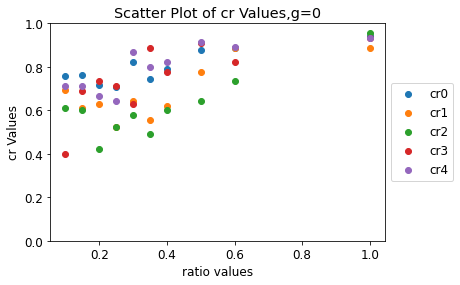

In [328]:
df = cr_which_group('ratio')
import matplotlib.pyplot as plt

for i in range(5):
    plt.scatter(df['ratio'], df[f'cr{i}'], label=f'cr{i}')


plt.title('Scatter Plot of cr Values,g=0')
plt.xlabel('ratio values')
plt.ylabel('cr Values')
plt.ylim(0, 1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


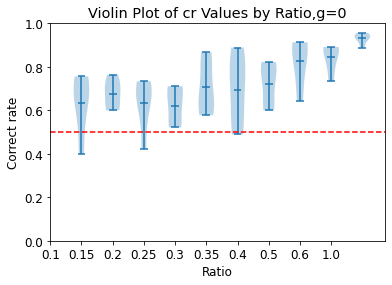

In [330]:
import matplotlib.pyplot as plt
import pandas as pd

df = cr_which_group('ratio').copy()
df['ratio'] = df['ratio'].round(2)

df_melt = pd.melt(df, id_vars=['ratio'], value_vars=[f'cr{i}' for i in range(5)])

plt.violinplot([df_melt.loc[df_melt['ratio'] == r, 'value'] for r in df_melt['ratio'].unique()], showmeans=True)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Violin Plot of cr Values by Ratio,g=0')
plt.xlabel('Ratio')
plt.ylabel('Correct rate')
plt.ylim(0, 1)
plt.xticks(range(len(df_melt['ratio'].unique())), df_melt['ratio'].unique())
plt.show()

In [19]:
cr_n_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camNeck','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_n_r_g_i.append(x)

e = cr_n_r_g_i[0]
for i in range(0,len(cr_n_r_g_i)-1):
    e = pd.merge(e,cr_n_r_g_i[i+1],how='left',on=['camNeck','ratio'])

e

cr0       cr1       cr2       cr3       cr4
camNeck ratio                                                  
0.0     0.10   0.733333  0.250000  0.411765  0.666667  0.466667
        0.15   0.666667  0.600000  0.428571  0.600000  0.400000
        0.20   0.500000  0.235294  0.600000  0.400000  0.533333
        0.25   0.533333  0.529412  0.368421  0.312500  0.533333
        0.30   0.466667  0.466667  0.375000  0.666667  0.666667
        0.35   0.866667  0.666667  0.625000  0.666667  0.733333
        0.40   0.866667  0.800000  0.866667  0.666667  0.666667
        0.50   0.733333  0.866667  0.600000  0.666667  0.866667
        0.60   0.866667  0.866667  0.866667  0.733333  1.000000
        1.00   0.733333  0.933333  0.800000  1.000000  1.000000
2.0     0.10   0.600000  0.705882  0.157895  0.428571  0.600000
        0.15   0.666667  0.312500  0.411765  0.333333  0.600000
        0.20   0.600000  0.666667  0.529412  0.466667  0.375000
        0.25   0.866667  0.687500  0.800000  0.666667  1.000000
        0.30   0.666667  0.733333  0.733333  0.533333  0.866667
        0.35   0.866667  0.666667  0.600000  0.562500  0.666667
        0.40   0.933333  0.666667  0.666667  0.733333  0.933333
        0.50   0.933333  0.666667  0.928571  0.866667  0.866667
        0.60   0.937500  0.866667  0.933333  0.866667  0.933333
        1.00   1.000000  0.933333  1.000000  1.000000  0.933333
3.5     0.10   0.411765  0.800000  0.272727  0.600000  0.733333
        0.15   0.466667  0.533333  0.466667  0.333333  0.266667
        0.20   0.666667  0.533333  0.500000  0.533333  0.466667
        0.25   0.666667  0.400000  0.466667  0.600000  0.733333
        0.30   0.600000  0.437500  0.555556  0.533333  0.533333
        0.35   0.800000  0.600000  0.800000  0.733333  0.600000
        0.40   0.800000  0.666667  0.733333  0.733333  0.800000
        0.50   0.733333  0.733333  0.687500  0.666667  0.800000
        0.60   0.866667  0.687500  0.666667  0.733333  0.800000
        1.00   0.933333  0.800000  0.866667  0.933333  0.866667

In [363]:
cr_td_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    ##
    x = crlist_(i)[1].copy().groupby(['targetsDistance','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_td_r_g_i.append(x)

b = cr_td_r_g_i[0] 
for i in range(0,len(cr_td_r_g_i)-1):
    b = pd.merge(b,cr_td_r_g_i[i+1],how='left',on=['targetsDistance','ratio'])

b

cr0       cr1       cr2       cr3       cr4
targetsDistance ratio                                                  
1.10            0.10   0.666667  0.777778  0.666667  0.555556  0.666667
                0.15   0.857143  0.555556  0.777778  0.888889  0.777778
                0.20   0.555556  0.444444  0.222222  0.888889  0.777778
                0.25   0.857143  0.800000  0.555556  0.555556  0.555556
                0.30   0.875000  0.666667  0.666667  0.666667  0.777778
                0.35   0.555556  0.555556  0.444444  0.888889  0.777778
                0.40   0.666667  0.444444  0.555556  0.777778  0.888889
                0.50   0.777778  0.666667  0.555556  0.888889  0.777778
                0.60   0.800000  1.000000  0.666667  0.777778  0.777778
                1.00   1.000000  0.555556  1.000000  1.000000  0.888889
1.15            0.10   0.875000  0.666667  0.777778  0.333333  0.666667
                0.15   0.625000  0.777778  0.444444  0.555556  0.666667
                0.20   0.571429  0.555556  0.444444  0.777778  0.666667
                0.25   0.333333  0.222222  0.444444  0.444444  0.555556
                0.30   1.000000  0.777778  0.555556  0.333333  1.000000
                0.35   0.666667  0.666667  0.333333  0.888889  0.666667
                0.40   0.666667  0.333333  0.444444  0.555556  0.888889
                0.50   1.000000  0.555556  0.333333  1.000000  1.000000
                0.60   0.888889  0.777778  0.777778  0.666667  0.888889
                1.00   1.000000  1.000000  0.888889  0.888889  1.000000
1.20            0.10   0.666667  0.700000  0.400000  0.444444  0.666667
                0.15   0.875000  0.555556  0.555556  0.555556  0.888889
                0.20   1.000000  0.555556  0.333333  0.555556  0.555556
                0.25   0.500000  0.555556  0.888889  0.888889  0.777778
                0.30   0.750000  0.444444  0.444444  0.777778  0.888889
                0.35   0.857143  0.333333  0.555556  0.777778  1.000000
                0.40   0.888889  0.888889  0.444444  1.000000  0.777778
                0.50   0.800000  0.777778  0.888889  0.888889  1.000000
                0.60   0.833333  0.777778  0.444444  0.777778  1.000000
                1.00   0.875000  0.888889  1.000000  1.000000  0.888889
1.30            0.10   0.714286  0.555556  0.555556  0.111111  0.888889
                0.15   0.750000  0.555556  0.555556  0.750000  0.666667
                0.20   0.571429  1.000000  0.444444  0.666667  0.666667
                0.25   1.000000  0.444444  0.125000  0.888889  0.444444
                0.30   0.777778  0.888889  0.777778  0.500000  0.777778
                0.35   0.833333  0.666667  0.555556  0.888889  0.777778
                0.40   0.833333  0.777778  0.888889  0.555556  0.666667
                0.50   1.000000  1.000000  0.444444  0.888889  0.800000
                0.60   0.875000  0.888889  0.777778  0.888889  0.800000
                1.00   0.857143  1.000000  0.888889  0.777778  0.888889
1.70            0.10   0.875000  0.777778  0.666667  0.555556  0.666667
                0.15   0.714286  0.600000  0.666667  0.700000  0.555556
                0.20   1.000000  0.600000  0.666667  0.777778  0.666667
                0.25   0.888889  0.555556  0.555556  0.777778  0.888889
                0.30   0.714286  0.444444  0.444444  0.888889  0.888889
                0.35   0.857143  0.555556  0.555556  1.000000  0.777778
                0.40   0.875000  0.666667  0.666667  1.000000  0.888889
                0.50   0.833333  0.888889  1.000000  0.888889  1.000000
                0.60   1.000000  1.000000  1.000000  1.000000  1.000000
                1.00   1.000000  1.000000  1.000000  1.000000  1.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0 1.7766662514250706e-07 1.15
1 0.0018767147216232805 1.3
2 0.037345705160335495 1.2
3 6.463830899303092e-05 1.7000000000000002
4 7.886368108331013e-07 1.1


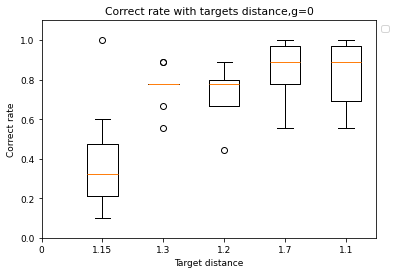

In [366]:
df = pd.DataFrame(columns=['f','p'])
for i in range(0,len(df_pon_behaviorC)):
    x = b.loc[:,[f'cr{i}']]
    xx = x.loc[1.10]
    tdlist = crlist_(0)[0]['targetsDistance'].unique() ##
    for index,item in enumerate(tdlist):
        if index < len(tdlist)-1:
            a = x.loc[tdlist[index+1]]
            xx = pd.merge(xx,a,how='left',on=['ratio'],suffixes=('',f'_{index+1}'))
        else:break
    xx = xx.reset_index('ratio').to_numpy().T

    f,p = stats.f_oneway(xx[0],xx[1],xx[2],xx[3],xx[4])
    df.loc[i] = [f,p]
    print(i,p,tdlist[i])
   

    #tarD 有差异

td = [0]
x = tdlist.shape[0]
for i in range(x):
    td.append(str(tdlist[i].round(2)))

plt.boxplot([xx[0],xx[1],xx[2],xx[3],xx[4]])
plt.title('Correct rate with targets distance,g=0')
plt.xticks(range(len(td)),td)
plt.xlabel('Target distance')
plt.ylabel('Correct rate')
plt.ylim(0,1.1)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.rcParams['font.size'] = 9
plt.show()

In [216]:


cr_id_r_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camID','ratio'])['isCorrect'].mean().to_frame()
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    cr_id_r_g_i.append(x)

a = cr_id_r_g_i[0]
for i in range(0,len(cr_id_r_g_i)-1):
    a = pd.merge(a,cr_id_r_g_i[i+1],how='left',on=['camID','ratio'])

a

cr0       cr1       cr2       cr3       cr4
camID ratio                                                  
1     0.10   0.466667  0.562500  0.315789  0.400000  0.533333
      0.15   0.466667  0.466667  0.555556  0.400000  0.400000
      0.20   0.666667  0.352941  0.437500  0.466667  0.312500
      0.25   0.800000  0.437500  0.411765  0.533333  0.733333
      0.30   0.466667  0.437500  0.333333  0.600000  0.666667
      0.35   0.666667  0.600000  0.562500  0.666667  0.533333
      0.40   0.733333  0.666667  0.866667  0.600000  0.733333
      0.50   0.666667  0.933333  0.733333  0.466667  0.866667
      0.60   0.812500  0.687500  0.733333  0.466667  1.000000
      1.00   0.666667  0.733333  0.733333  0.933333  0.866667
2     0.10   0.533333  0.666667  0.235294  0.785714  0.600000
      0.15   0.533333  0.466667  0.411765  0.466667  0.266667
      0.20   0.400000  0.533333  0.647059  0.466667  0.533333
      0.25   0.533333  0.411765  0.625000  0.533333  0.933333
      0.30   0.666667  0.666667  0.500000  0.266667  0.533333
      0.35   0.866667  0.666667  0.800000  0.625000  0.800000
      0.40   0.866667  0.666667  0.800000  0.866667  0.733333
      0.50   0.800000  0.666667  0.600000  0.866667  0.733333
      0.60   1.000000  0.866667  0.800000  0.866667  0.733333
      1.00   1.000000  0.933333  0.933333  1.000000  1.000000
3     0.10   0.705882  0.529412  0.272727  0.533333  0.666667
      0.15   0.800000  0.500000  0.333333  0.400000  0.600000
      0.20   0.687500  0.533333  0.533333  0.466667  0.533333
      0.25   0.733333  0.800000  0.562500  0.500000  0.600000
      0.30   0.600000  0.533333  0.866667  0.866667  0.866667
      0.35   1.000000  0.666667  0.666667  0.666667  0.666667
      0.40   1.000000  0.800000  0.600000  0.666667  0.933333
      0.50   0.933333  0.666667  0.866667  0.866667  0.933333
      0.60   0.866667  0.866667  0.933333  1.000000  1.000000
      1.00   1.000000  1.000000  1.000000  1.000000  0.933333

In [23]:

for i in range(0,len(df_pon_behaviorC)):
    x = a.loc[:,[f'cr{i}']]
    xx = x.loc[1]
    for i in range(1,3):
        xx = pd.merge(xx,x.loc[i+1],how='left',on=['ratio'])
    xx = xx.reset_index().drop(columns=['ratio']).to_numpy().T
    f2,p2 = stats.f_oneway(xx[0],xx[1],xx[2])
    print(f2,p2)
    
#camID 没差异

3.2435070871870213 0.054648603144163824
0.9397573759352251 0.4031320043743341
0.49925773692430836 0.6124748346752478
1.3548975083006638 0.2749574354119846
0.7974626969901533 0.46079711472480495


In [24]:
sampels = []
for i in range(1,4):
    x = a.loc[i].reset_index(drop=False).drop(columns=['ratio']).to_numpy()
    sampels.append(x)

f,p = stats.f_oneway(sampels[0],sampels[1],sampels[2])
print(f,p)
# 个体之间没有显著差异


[3.24350709 0.93975738 0.49925774 1.35489751 0.7974627 ] [0.0546486  0.403132   0.61247483 0.27495744 0.46079711]


##C_sure

In [388]:

cr_id_n_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x0 = crlist_(i)[1].copy() ##
    x0  = x0.loc[x0['ratio']>0] ##
    x=x0.groupby(['camID','camNeck'])['isCorrect'].mean().to_frame()
    #print(x0.groupby(['camID','camNeck'])['isCorrect'].count())
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    x = x.reset_index(drop=False)
    cr_id_n_g_i.append(x)

c = cr_id_n_g_i[0]
for i in range(0,len(cr_id_n_g_i)-1):
    c = pd.merge(c,cr_id_n_g_i[i+1],how='left',on=['camID','camNeck'])
c_sure = c
c_sure

,camID,camNeck,cr0,cr1,cr2,cr3,cr4
0,1,0.0,0.871795,0.740000,0.700000,0.840000,0.820000
1,1,2.0,0.765957,0.640000,0.680000,0.745098,0.784314
2,1,3.5,0.846154,0.607843,0.673469,0.620000,0.740000
3,2,0.0,0.953488,0.740000,0.607843,0.840000,0.860000
4,2,2.0,0.697674,0.711538,0.620000,0.740000,0.820000
5,2,3.5,0.756098,0.700000,0.440000,0.647059,0.760000
6,3,0.0,0.833333,0.740000,0.620000,0.820000,0.820000
7,3,2.0,0.760870,0.666667,0.600000,0.755102,0.800000
8,3,3.5,0.717949,0.600000,0.600000,0.740000,0.764706


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


12.149525796601477 1.4819113769475844e-06


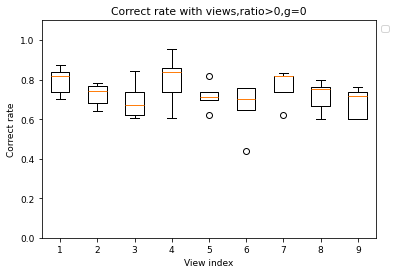

In [389]:

cr_cams = c_sure.drop(columns=['camNeck','camID']).to_numpy()
fs,ps = stats.f_oneway(*cr_cams.T)
print(fs,ps)

# 机位显示差异
plt.boxplot(cr_cams.T)

plt.title('Correct rate with views,ratio>0,g=0')##

plt.xlabel('View index')
plt.ylabel('Correct rate')
plt.ylim(0,1.1)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.rcParams['font.size'] = 9
plt.show()

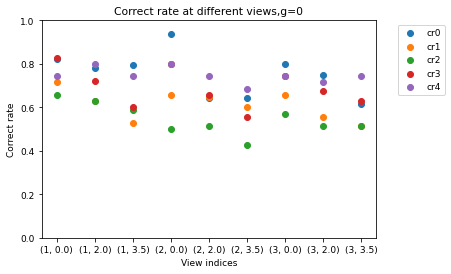

In [371]:
x =c.shape[0]

df = c_sure.copy()
l= []
for i in range(x):
    a = df['camID'][i],df['camNeck'][i]
    l.append(a)

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

for i in range(5):
    plt.scatter(df.index, df[f'cr{i}'], label=f'cr{i}')

plt.title('Correct rate at different views,g=0')
plt.xlabel('View indices')
plt.ylabel('Correct rate')
plt.ylim(0,1)
plt.xticks(range(len(l)),labels=l)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


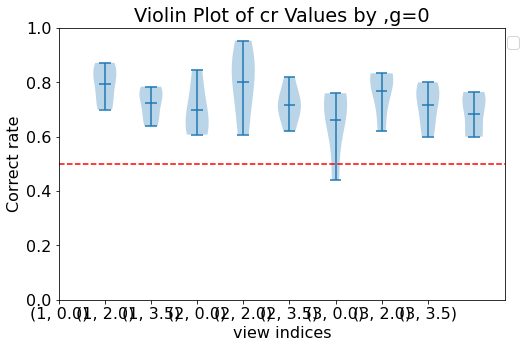

In [357]:
df = c_sure.copy()

df['index'] = df.index
df_melt = pd.melt(df, id_vars='index', value_vars=['cr0', 'cr1', 'cr2', 'cr3', 'cr4'],)

plt.figure(figsize=(8,5))
plt.violinplot([df_melt.loc[df_melt['index'] == r, 'value'] for r in df_melt['index'].unique()],
               showmeans=True)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Violin Plot of cr Values by ,g=0') ##
plt.xticks(range(len(l)),labels=l)
plt.xlabel('view indices')
plt.ylabel('Correct rate')
plt.ylim(0, 1)
plt.legend(loc = 'best',bbox_to_anchor=(1.05, 1))
plt.rcParams['font.size'] = 16
plt.show()

In [265]:
cr_id_n_g_i = []
for i in range(0,len(df_pon_behaviorC)):
    x = crlist_(i)[0].copy().groupby(['camID','camNeck'])['isCorrect'].mean().to_frame()
   # print(crlist_(i)[0].copy().groupby(['camID','camNeck'])['isCorrect'].count())
    x[f'cr{i}'] = x['isCorrect']
    x = x.drop(columns=['isCorrect'])
    x = x.reset_index(drop=False)
    cr_id_n_g_i.append(x)

c = cr_id_n_g_i[0]
for i in range(0,len(cr_id_n_g_i)-1):
    c = pd.merge(c,cr_id_n_g_i[i+1],how='left',on=['camID','camNeck'])
c

,camID,camNeck,cr0,cr1,cr2,cr3,cr4
0,1,0.0,0.580000,0.518519,0.527273,0.500000,0.620000
1,1,2.0,0.725490,0.680000,0.574074,0.640000,0.784314
2,1,3.5,0.620000,0.557692,0.563636,0.520000,0.580000
3,2,0.0,0.700000,0.647059,0.603774,0.720000,0.720000
4,2,2.0,0.780000,0.725490,0.698113,0.620000,0.680000
5,2,3.5,0.680000,0.580000,0.576923,0.680000,0.660000
6,3,0.0,0.803922,0.680000,0.607143,0.686275,0.720000
7,3,2.0,0.920000,0.660377,0.700000,0.680000,0.860000
8,3,3.5,0.769231,0.720000,0.618182,0.720000,0.740000


In [28]:
for i in range(0,len(df_pon_behaviorC)):
    x = a.loc[:,[f'cr{i}']]
    xx = x.loc[1]
    for i in range(1,3):
        xx = pd.merge(xx,x.loc[i+1],how='left',on=['ratio'])
    xx = xx.reset_index().drop(columns=['ratio']).to_numpy().T
    f,p = stats.f_oneway(xx[0],xx[1],xx[2])
    print(f,p)
#camID 没差异

3.2435070871870213 0.054648603144163824
0.9397573759352251 0.4031320043743341
0.49925773692430836 0.6124748346752478
1.3548975083006638 0.2749574354119846
0.7974626969901533 0.46079711472480495


In [29]:
# read 2afc time

import matplotlib.pyplot as plt

def read2afcTime(session3_cam1,name):
    tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
    color = ['yellow','b','green','pink','orange','purple']
    list= []
    fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
    fig.suptitle(f'{name}, 2afc time')
    for i,item in enumerate(tarDislist):
        d = {'tarD':item,'l':[]}
        list.append(d)
        ax[i].set_title(f'{name}, tarDistance: {item.round(2)}')
        # compare across inidividual
        for j in range(0,len(df_pon_behaviorC)):
            toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
            ttimtIni_s3_id1 = toplt['rT'].mean().reset_index(drop=False)
            data = {'inidividual':j,'rT':ttimtIni_s3_id1['rT'].tolist(),'ratio':ttimtIni_s3_id1['ratio'].round(2).tolist()}
            list[i]['l'].append(data)
            ax[i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['rT'],color=color[j])
            ax[i].set_ylim(0,2)

    fig, ax = plt.subplots(figsize=(7, 4))

    for t,item in enumerate(tarDislist):
        listrT=[]
        for i , item in enumerate(sorted(df_pon_behaviorC[0]['df']['ratio'].unique())):
            data = {'ratio':item,'rT':[]}
            listrT.append(data)
            #print(item.round(2))
        # print(list[t]['tarD'])
            for j in range(0,len(df_pon_behaviorC)):
                listrT[i]['rT'].append(list[t]['l'][j]['rT'][i])

        x = sorted(df_pon_behaviorC[0]['df']['ratio'].unique())
        y = [np.mean(listrT[0]['rT']),np.mean(listrT[1]['rT']),np.mean(listrT[2]['rT']),np.mean(listrT[3]['rT']),np.mean(listrT[4]['rT'])
            ,np.mean(listrT[5]['rT']),np.mean(listrT[6]['rT']),np.mean(listrT[7]['rT']),np.mean(listrT[8]['rT']),np.mean(listrT[9]['rT'])]
        xerr = 0
        yerr = [np.std(listrT[0]['rT']),np.std(listrT[1]['rT']),np.std(listrT[2]['rT']),np.std(listrT[3]['rT']),np.std(listrT[4]['rT'])
            ,np.std(listrT[5]['rT']),np.std(listrT[6]['rT']),np.std(listrT[7]['rT']),np.std(listrT[8]['rT']),np.std(listrT[9]['rT'])]

        ls = 'dotted'
        ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls,label=f'tar{tarDislist[t].round(2)}')
        ax.set_ylim(0,2)
        plt.xticks(x)
        plt.suptitle(f'RTtoRatio {name}')##
        plt.legend()
        plt.savefig(f'{name} RTtoRatio.png') 

NameError: name 'np' is not defined

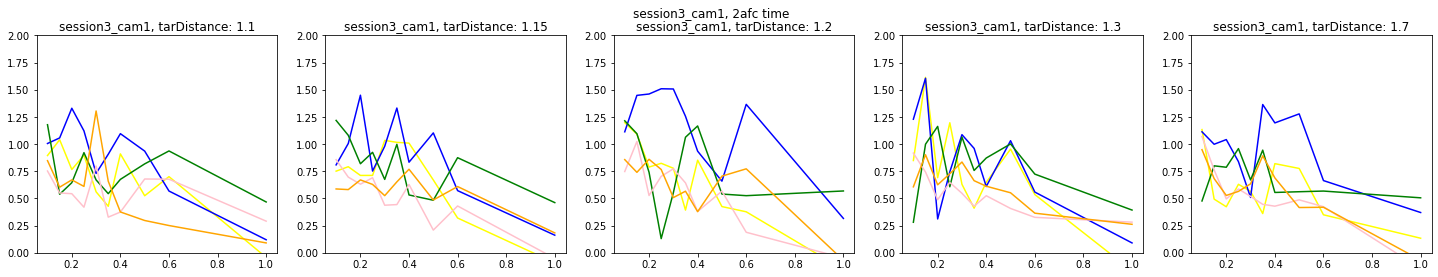

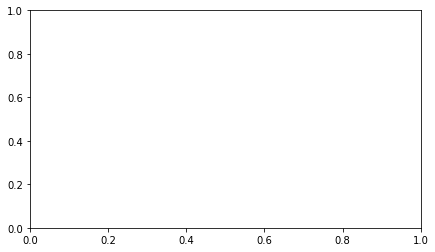

In [30]:
read2afcTime(session3_cam1,'session3_cam1')
read2afcTime(session3_cam2,'session3_cam2')
read2afcTime(session3_cam3,'session3_cam3')
read2afcTime(session4_cam1,'session4_cam1')
read2afcTime(session4_cam2,'session4_cam2')
read2afcTime(session4_cam3,'session4_cam3')

In [ ]:
#fig, ax = plt.subplots(2* len(df_pon_behaviorC),1, figsize=(25, 15))
def getCR(session3_cam1):
    session3_cam1_CR =[]
    for i,item in enumerate(session3_cam1):
        list = item['df'].groupby('isCorrect').size().reset_index(name='counts')
        cr = list['counts'][1]/(list['counts'][0]+list['counts'][1])
        session3_cam1_CR.append(cr.round(3))
    return(session3_cam1_CR) #session3_cam1_CR

list = [session3_cam1,
session3_cam2,
session3_cam3,
session4_cam1,
session4_cam2,
session4_cam3]

liststr = ['session3_cam1',
'session3_cam2',
'session3_cam3',
'session4_cam1',
'session4_cam2',
'session4_cam3']

import numpy as np

listCR = []
listCR_ = []
for i,item in enumerate(list):
    data = getCR(item)
    mean = numpy.mean(data)
    std = numpy.std(data)
    cr = {'group':liststr[i],'cr_individuals':data,'mean':mean,'std':std}
    listCR.append(cr)
    listCR_.append(data)
listCR

pdf = pd.DataFrame(listCR_)
pdf.to_excel('listCR_.xlsx',index=True)

In [292]:
x = [1,2,3]
y = [np.mean(listCR_[0]), np.mean(listCR_[1]), np.mean(listCR_[2])]
y2 = [np.mean(listCR_[3]), np.mean(listCR_[4]), np.mean(listCR_[5])]
xerr = 0
yerr = [np.std(listCR_[0]), np.std(listCR_[1]), np.std(listCR_[2])]
yerr2 = [np.std(listCR_[3]), np.std(listCR_[4]), np.std(listCR_[5])]
ls = 'dotted'

fig, ax = plt.subplots(figsize=(7, 4))
ax.errorbar(x, y, xerr=xerr, yerr=yerr, linestyle=ls,label='g=9.8')
ax.errorbar(x, y2, xerr=xerr, yerr=yerr2, linestyle=ls,label='g=0')
ax.set_ylim(0,1)
plt.xticks(x)
plt.suptitle('camId CR ')##
plt.legend()
#plt.savefig('pon_CR_camID_allRatio.png') 

NameError: name 'listCR_' is not defined

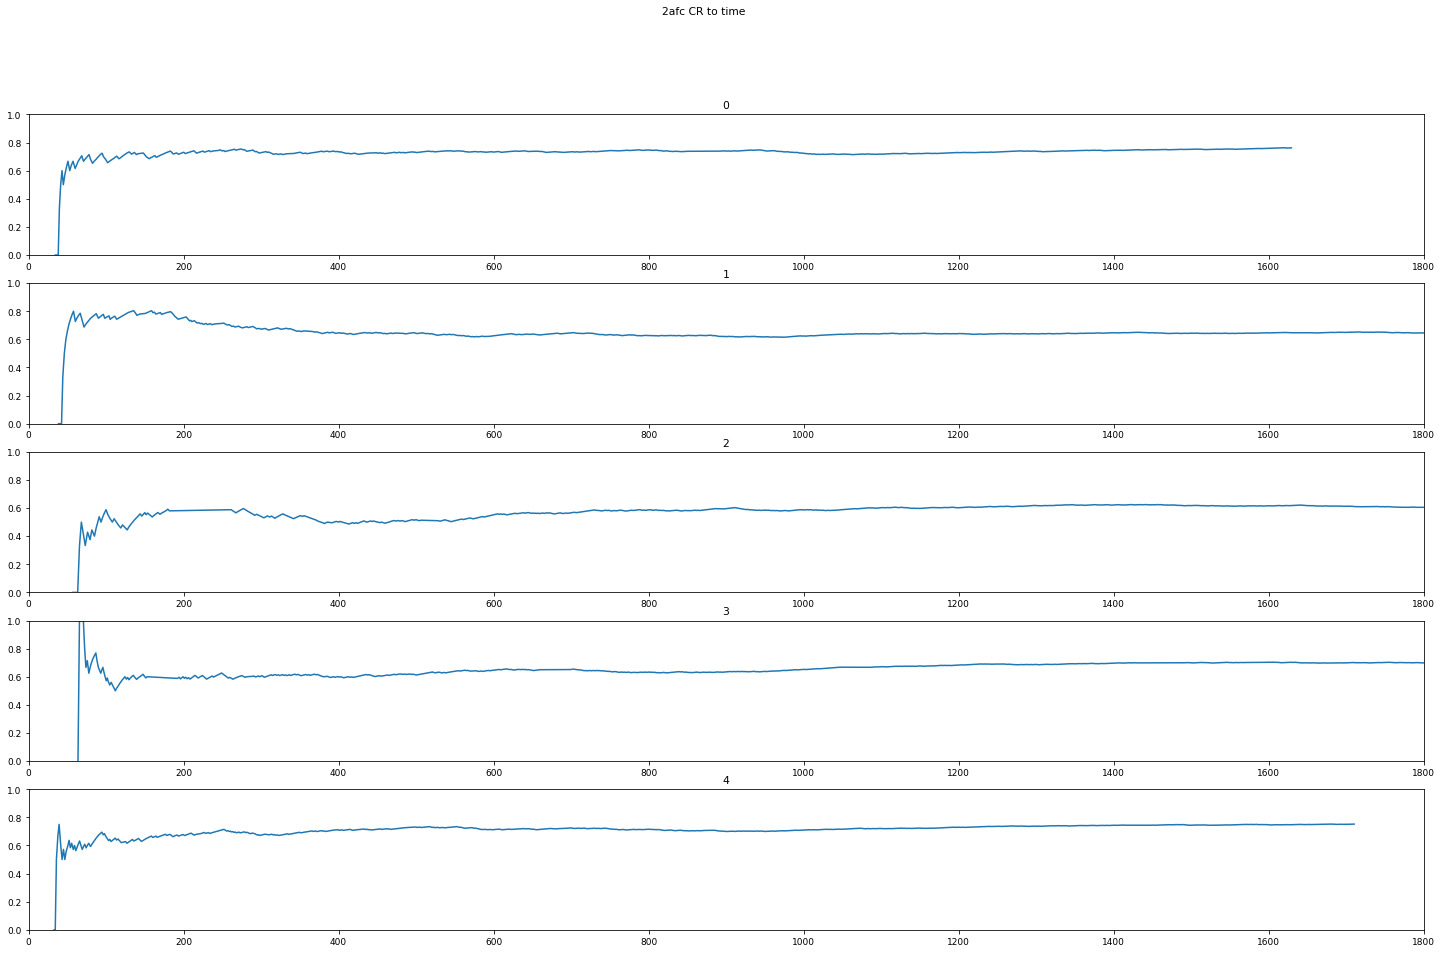

In [291]:
# read 2afc CR change\
import matplotlib.pyplot as plt
fig, ax = plt.subplots(len(df_pon_behaviorC),1, figsize=(25, 15))
fig.suptitle('2afc CR to time')
for i,item in enumerate(df_pon_behaviorC):
    ax[i].set_title(str(i))
    a=item['df']['correctRate'].astype(float)
    x=item['df']['initTime'].astype(float)
    ax[i].plot(x,a)
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(0,1800)
plt.savefig('2afc_CRtoTime.png')

1.1
1.15
1.2
1.3
1.7


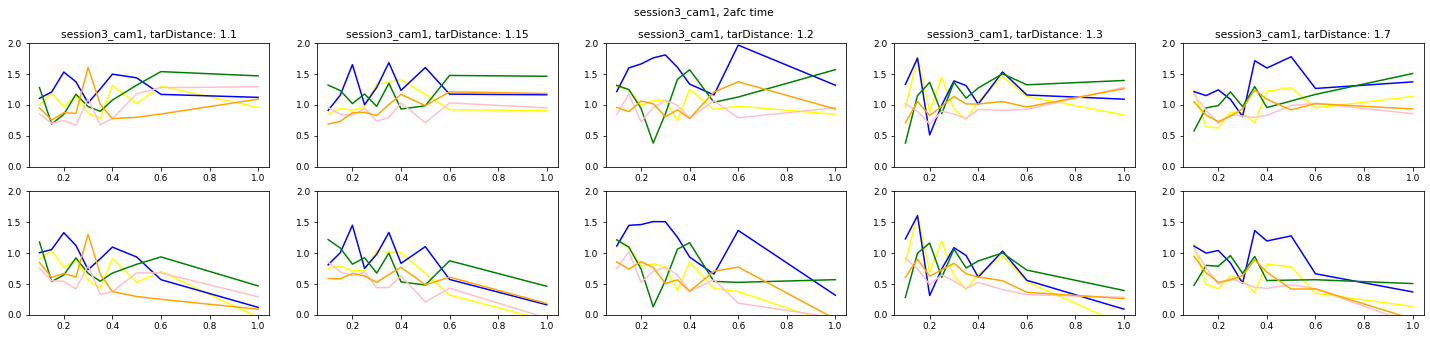

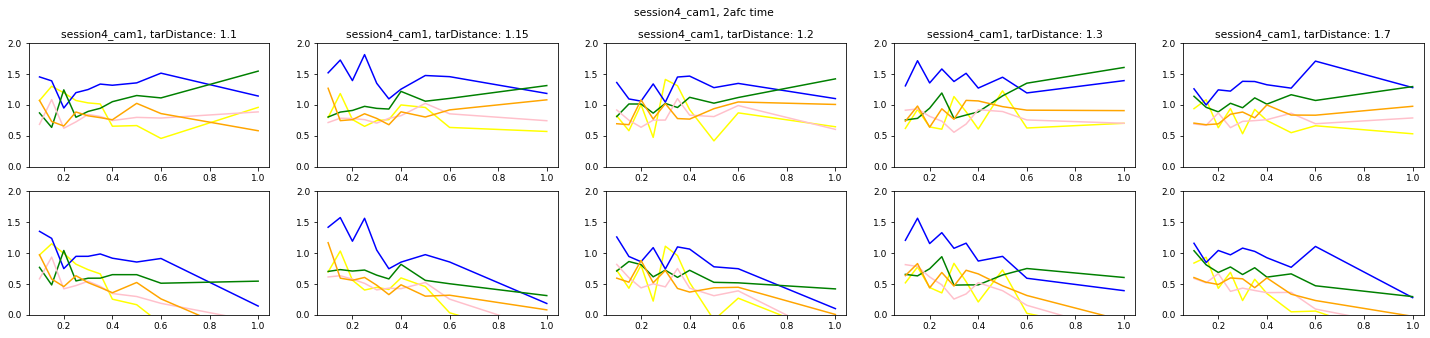

In [290]:
# read 2afc time
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(2,len(tarDislist), figsize=(25, 5))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    print(item.round(2))
    ax[0,i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id1 = ttimtIni_s3_id1
        ttimtPaus_s3_id1['touchTimefromPause'] = ttimtIni_s3_id1['touchTimefromInit']- ttimtIni_s3_id1['ratio']
       
        ax[0,i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['touchTimefromInit'],color=color[j])
        ax[0,i].set_ylim(0,2)
        
        ax[1,i].plot(ttimtPaus_s3_id1['ratio'],ttimtPaus_s3_id1['touchTimefromPause'],color=color[j])
        ax[1,i].set_ylim(0,2)

fig, ax = plt.subplots(2,len(tarDislist), figsize=(25, 5))
fig.suptitle('session4_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[0,i].set_title(f'session4_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session4_cam1[j]['df'].loc[session4_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s4_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s4_id1 = ttimtIni_s4_id1
        ttimtPaus_s4_id1['touchTimefromPause'] = ttimtIni_s4_id1['touchTimefromInit']- ttimtIni_s4_id1['ratio']
        ax[0,i].plot(ttimtIni_s4_id1['ratio'],ttimtIni_s4_id1['touchTimefromInit'],color=color[j])
        ax[0,i].set_ylim(0,2)
        
        ax[1,i].plot(ttimtPaus_s4_id1['ratio'],ttimtPaus_s4_id1['touchTimefromPause'],color=color[j])
        ax[1,i].set_ylim(0,2)


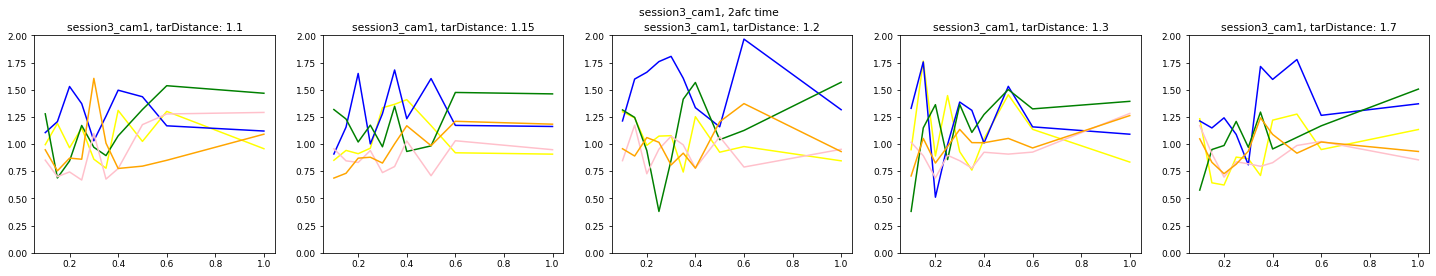

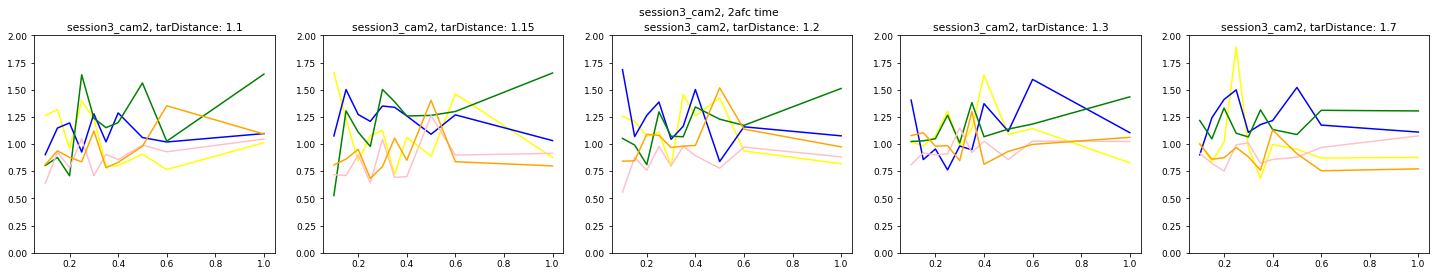

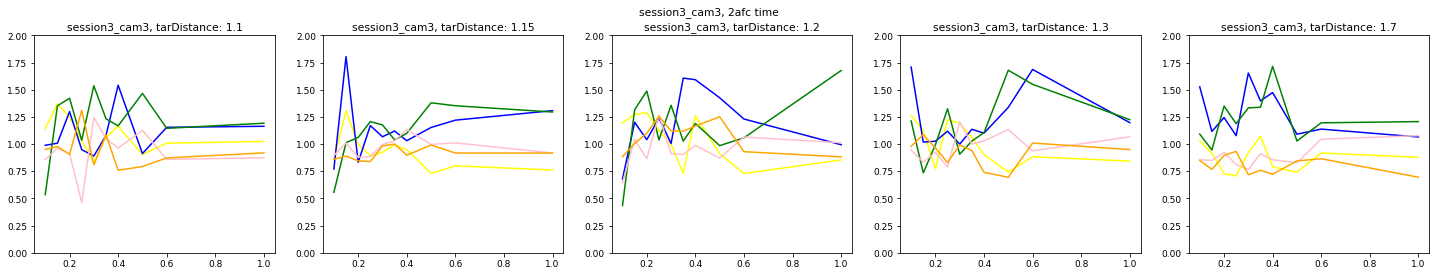

In [288]:
# read 2afc time
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id1['ratio'],ttimtIni_s3_id1['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam2, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam2, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam2[j]['df'].loc[session3_cam2[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id2 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id2['ratio'],ttimtIni_s3_id2['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam3, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam3, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam3[j]['df'].loc[session3_cam3[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id3 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
       
        ax[i].plot(ttimtIni_s3_id3['ratio'],ttimtIni_s3_id3['touchTimefromInit'],color=color[j])
        ax[i].set_ylim(0,2)



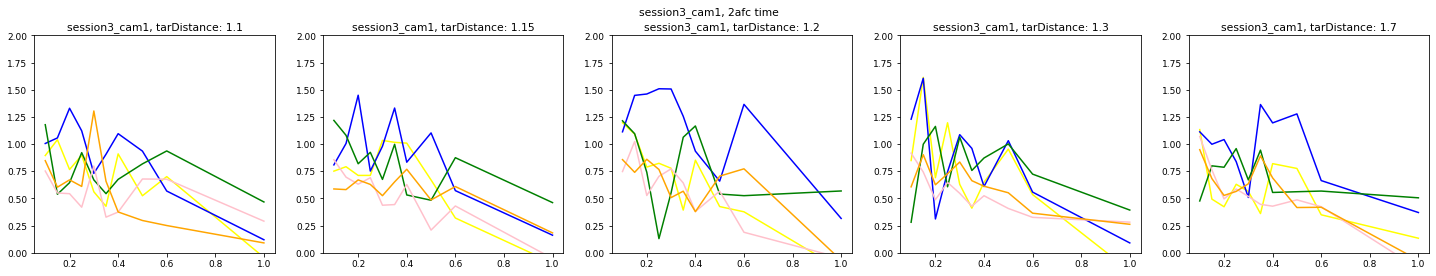

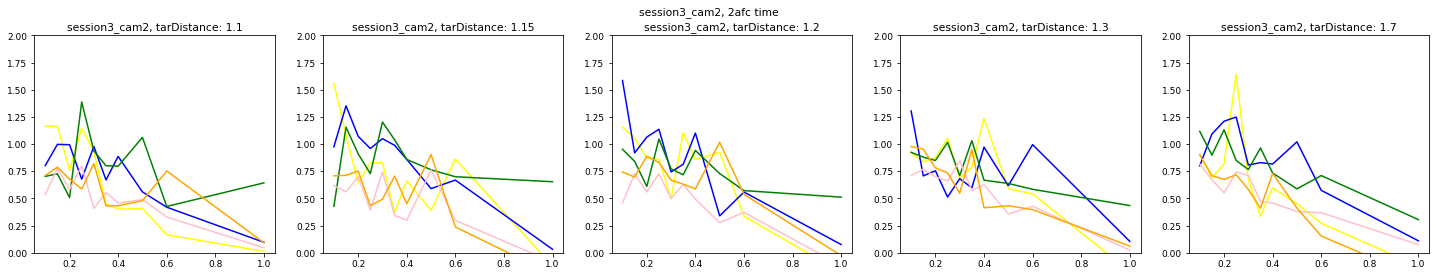

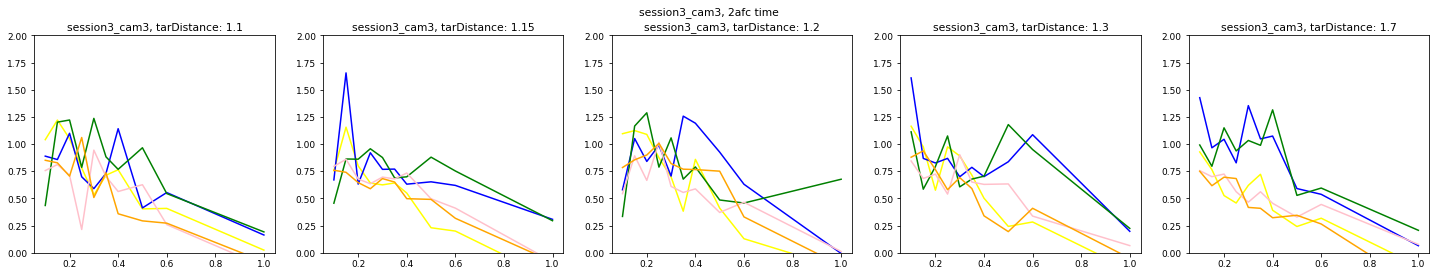

In [289]:
# read 2afc time from pause
import matplotlib.pyplot as plt
tarDislist= sorted(df_pon_behaviorC[0]['df']['targetsDistance'].unique())
color = ['yellow','b','green','pink','orange','purple']

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam1, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam1, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam1[j]['df'].loc[session3_cam1[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id1 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id1 = ttimtIni_s3_id1
        ttimtPaus_s3_id1['touchTimefromPause'] = ttimtIni_s3_id1['touchTimefromInit']- ttimtIni_s3_id1['ratio']
       
        ax[i].plot(ttimtPaus_s3_id1['ratio'],ttimtPaus_s3_id1['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam2, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam2, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam2[j]['df'].loc[session3_cam2[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id2 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id2 = ttimtIni_s3_id2
        ttimtPaus_s3_id2['touchTimefromPause'] = ttimtIni_s3_id2['touchTimefromInit']- ttimtIni_s3_id2['ratio']
       
        ax[i].plot(ttimtPaus_s3_id2['ratio'],ttimtPaus_s3_id2['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

fig, ax = plt.subplots(1,len(tarDislist), figsize=(25, 4))
fig.suptitle('session3_cam3, 2afc time')
for i,item in enumerate(tarDislist):
    ax[i].set_title(f'session3_cam3, tarDistance: {item.round(2)}')
    # compare across inidividual
    for j in range(0,len(df_pon_behaviorC)):
        toplt = session3_cam3[j]['df'].loc[session3_cam3[j]['df']['targetsDistance'] == item].groupby('ratio')
        ttimtIni_s3_id3 = toplt['touchTimefromInit'].mean().reset_index(drop=False)
        ttimtPaus_s3_id3 = ttimtIni_s3_id3
        ttimtPaus_s3_id3['touchTimefromPause'] = ttimtIni_s3_id3['touchTimefromInit']- ttimtIni_s3_id3['ratio'] 
       
        ax[i].plot(ttimtPaus_s3_id3['ratio'],ttimtPaus_s3_id3['touchTimefromPause'],color=color[j])
        ax[i].set_ylim(0,2)

In [ ]:
## compare mean and std and distribution
## plot  x <- tar ,indipendently ratio
## compare acreoss view perspectives
## or substract first then average

In [ ]:
## read eye
## define event
## event coralate with frame
## plot pupil
